In [7]:
%matplotlib inline
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
import seaborn
from tqdm import tqdm,tqdm_gui
from scipy.optimize import curve_fit
import sympy as sm
rcParams['figure.figsize'] = (12.0, 7.0)
from IPython.core.debugger import Tracer

In [52]:
def Euler(f,tt,y0):
    y=np.array([y0])
    dt=tt[1]-tt[0]
    for t in tt[1:]:
        y=np.append(y,y[-1]+f(y[-1],t)*dt)
    return y
def Euler2(f,tt,y0): 
    y=np.array(y0,ndmin=2) #Αρχικές τιμές (πίνακας θέσης,ταχύτητας)
    dt=tt[2]-tt[1] #step size
    for t in tt[1:]:
        y=np.vstack((y,y[-1]+f(t,y[-1][0],y[-1][1])*dt)) #Μέθοδος Euler
    return y

In [53]:
def f2(t,y1,y2): return np.array([y2,1])
tt=np.arange(0,5,0.2)
ye=Euler2(f2,tt,np.array([0,0]))

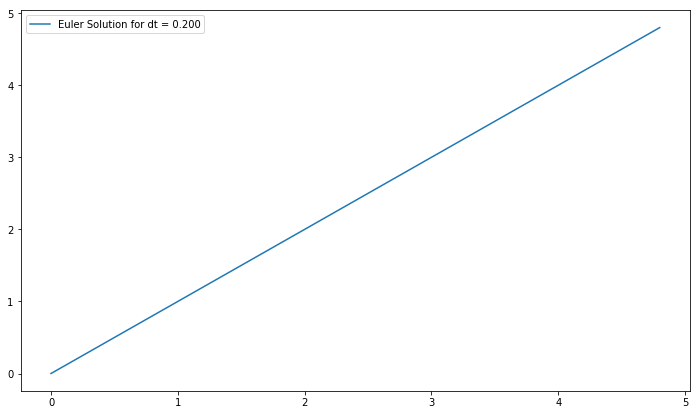

In [60]:
plt.plot(tt,ye[:,1],label='Euler Solution for dt = {:.3f}'.format(tt[1]-tt[0]))
#plt.plot(tt,tt**2,label='True Solution')
plt.legend()

## Συναρτήσεις μεθόδων αριθμητικής ολοκλήρωσης
Και στις δύο μεθόδους δίνουμε την διαφορική συνάρτηση σε μορφή πίνακα. Δηλαδή λύνουμε το σύστημα:
$$
\dot{\mathbf{X}}=
\begin{pmatrix}
\dot{x} \\ \dot{u}_x
\end{pmatrix}=
\begin{pmatrix}
u_x \\ 0
\end{pmatrix}
$$
και
$$
\dot{\mathbf{Y}}=
\begin{pmatrix}
\dot{y} \\ \dot{u}_y
\end{pmatrix}
=
\begin{pmatrix}
u_y \\ -g
\end{pmatrix}
$$
### Μέθοδος Euler
$$
\begin{pmatrix}
x_{i+1} \\ u_{x,i+1}
\end{pmatrix}=
\begin{pmatrix}
x_{i} \\u_{x,i}
\end{pmatrix}+
\begin{pmatrix}
u_{x,i} \\ 0
\end{pmatrix}
$$

In [61]:
def Euler(df,y0,T): 
    y=np.array(y0,ndmin=2) #Αρχικές τιμές (πίνακας θέσης,ταχύτητας)
    dt=T[2]-T[1] #step size
    for i,t in enumerate(T[1:]):
        y=np.vstack((y,y[-1]+df(t,y[-1][0],y[-1][1])*dt)) #Μέθοδος Euler
    return y
def RungeKutta(df,y0,T):
    y=np.array(y0,ndmin=2)
    dt=T[2]-T[1]
    for i,t in enumerate(T[1:]):
        k1=df(t,y[-1][0],y[-1][1])
        k2=df(t+dt*0.5,y[-1][0]+k1[0]*0.5*dt,y[-1][1]+k1[1]*0.5*dt)
        k3=df(t+dt*0.5,y[-1][0]+k2[0]*0.5*dt,y[-1][1]+k2[1]*0.5*dt)
        k4=df(t+dt,y[-1][0]+k3[0]*dt,y[-1][1]+k3[1]*dt)
        y=np.vstack((y,y[-1]+(k1+2.*k2+2.*k3+k4)/6 *dt))
    return y

In [62]:
tt=np.array([1,5,3,6,7,8])

In [64]:
for i,t in enumerate(tt):
    print(i,t)

0 1
1 5
2 3
3 6
4 7
5 8


In [65]:
g=10.
x0,y0=0.,0.
u0x,u0y=20.*np.cos(np.pi/3.),20.*np.sin(np.pi/3.)

In [66]:
def dux(t,x,ux): return np.array([ux,0])
def duy(t,y,uy): return np.array([uy,-g])

In [67]:
#T=np.linspace(0,4,50)
T=np.arange(0,3.6,0.1)
Xe = Euler(dux,np.array([x0,u0x]),T)
Ye = Euler(duy,np.array([y0,u0y]),T)
Xrk = RungeKutta(dux,np.array([x0,u0x]),T)
Yrk = RungeKutta(duy,np.array([y0,u0y]),T)
xr=x0+u0x*T
yr=y0+u0y*T-0.5*g*T**2

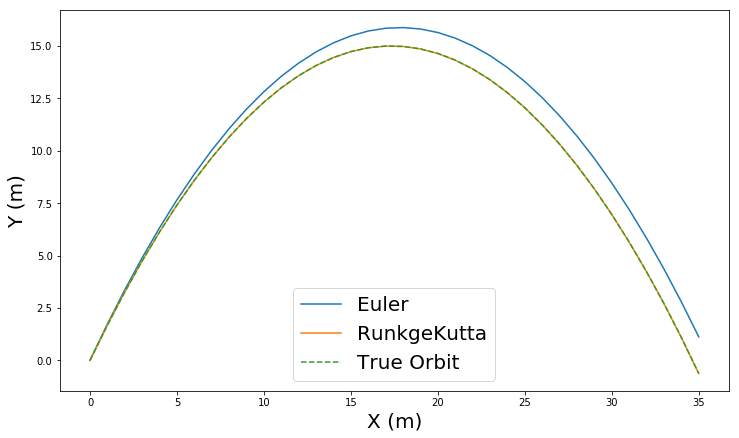

In [68]:
plt.plot(Xe[:,0],Ye[:,0],label='Euler')
plt.plot(Xrk[:,0],Yrk[:,0],label='RunkgeKutta')
plt.plot(xr,yr,'--',label='True Orbit')
plt.xlabel('X (m)',fontsize=20)
plt.ylabel('Y (m)',fontsize=20)
plt.legend(fontsize=20)

In [8]:
de=np.sqrt((Xe[:,0]-xr)**2+(Ye[:,0]-yr)**2)
drk=np.sqrt((Xrk[:,0]-xr)**2+(Yrk[:,0]-yr)**2)

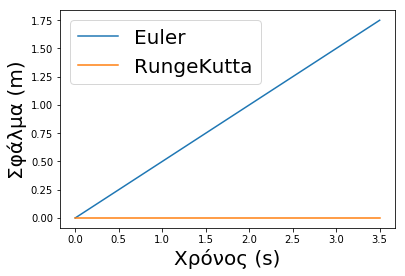

In [9]:
plt.plot(T,de,label='Euler')
plt.plot(T,drk,label='RungeKutta')
#plt.yscale('log')
plt.ylabel(u'Σφάλμα (m)',fontsize=20)
plt.xlabel(u'Χρόνος (s)',fontsize=20)
plt.legend(fontsize=20)

In [10]:
def dist(X,Y,Xr,Yr):
    return np.sqrt((X[-1][0]-Xr[-1])**2+(Y[-1][0]-Yr[-1])**2)

In [11]:
EulerError=np.array([])
RKError=np.array([])
dts=np.logspace(-5,0,50)
for dt in dts:
    T=np.arange(0,3.6,dt)
    Xe = Euler(dux,np.array([x0,u0x]),T)
    Ye = Euler(duy,np.array([y0,u0y]),T)
    Xrk = RungeKutta(dux,np.array([x0,u0x]),T)
    Yrk = RungeKutta(duy,np.array([y0,u0y]),T)
    xr=x0+u0x*T
    yr=y0+u0y*T-0.5*g*T**2
    EulerError=np.append(EulerError,dist(Xe,Ye,xr,yr))
    RKError=np.append(RKError,dist(Xrk,Yrk,xr,yr))

KeyboardInterrupt: 

In [ ]:
plt.loglog(dts,EulerError,label='Euler')
plt.loglog(dts,RKError,label='Runge Kutta')
plt.ylabel(u'Σφάλμα (m)',fontsize=20)
plt.xlabel('dt (s)',fontsize=20)
plt.legend(fontsize=20,loc='best')

Λύνουμε το σύστημα:
$$
\mathbf{X}=
\begin{pmatrix}
\dot{x} \\ \dot{u}_x
\end{pmatrix}=
\begin{pmatrix}
u_x \\ -\frac{g}{5}u_x
\end{pmatrix}
$$
και
$$
\mathbf{Y}=
\begin{pmatrix}
\dot{y} \\ \dot{u}_y 
\end{pmatrix}
=
\begin{pmatrix}
u_y \\ -g -\frac{g}{5}u_y
\end{pmatrix}
$$

In [69]:
phi=np.pi/3
g=10.
x0,y0=0.,0.
u0x,u0y=20.*np.cos(phi),20.*np.sin(phi)
def dux(t,x,ux): return np.array([ux,-g/5*ux])
def duy(t,y,uy): return np.array([uy,-g-g/5*uy])
T=np.arange(0,3.6,0.01)
Xrk = RungeKutta(dux,np.array([x0,u0x]),T)
Yrk = RungeKutta(duy,np.array([y0,u0y]),T)

In [70]:
e=0.2
Xrk[:,0][np.logical_and(Yrk[:,0]>0.-e,Yrk[:,0]<0.+e)][-1]

4.9433329338824805

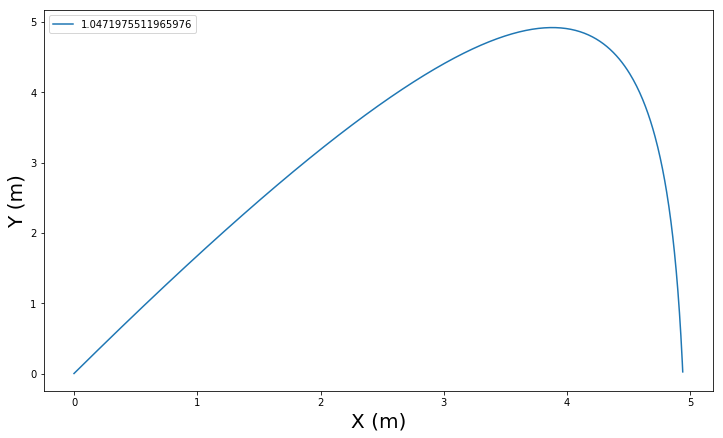

In [71]:
plt.plot(Xrk[:,0][Yrk[:,0]>=0],Yrk[:,0][Yrk[:,0]>=0],label=phi)
plt.xlabel('X (m)',fontsize=20)
plt.ylabel('Y (m)',fontsize=20)
plt.legend(fontsize=10,loc='best')

0.0 3.429531798108117
0.19634954084936207 7.437157301070824
0.39269908169872414 8.36646620565968
0.5890486225480862 7.961938976635576
0.7853981633974483 6.91601484397405
0.9817477042468103 5.483275259652366
1.1780972450961724 3.7927174121619367
1.3744467859455345 1.9372216765779333


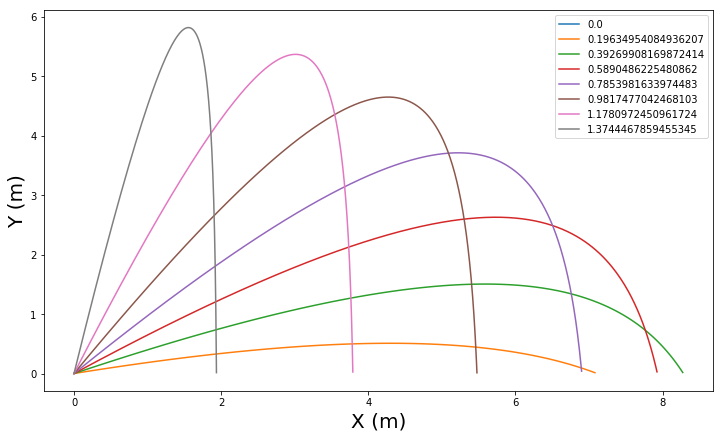

In [73]:
for phi in np.arange(0.,np.pi/2,np.pi/16):
    g=10.
    x0,y0=0.,0.
    u0x,u0y=20.*np.cos(phi),20.*np.sin(phi)
    Xrk = RungeKutta(dux,np.array([x0,u0x]),T)
    Yrk = RungeKutta(duy,np.array([y0,u0y]),T)
    print (phi,Xrk[:,0][np.logical_and(Yrk[:,0]>0.-e,Yrk[:,0]<0.+e)][-1])
    plt.plot(Xrk[:,0][Yrk[:,0]>=0],Yrk[:,0][Yrk[:,0]>=0],label=phi)
plt.xlabel('X (m)',fontsize=20)
plt.ylabel('Y (m)',fontsize=20)
plt.legend(fontsize=10,loc='best')

In [75]:
bestR=0.
bestPhi=0.
a=np.array([])
Phis=np.arange(0.,np.pi/2,np.pi/200)
for phi in Phis:
    u0x,u0y=20.*np.cos(phi),20.*np.sin(phi)
    Xrk = RungeKutta(dux,np.array([x0,u0x]),T)
    Yrk = RungeKutta(duy,np.array([y0,u0y]),T)
    embelia=Xrk[:,0][np.logical_and(Yrk[:,0]>0.-e,Yrk[:,0]<0.+e)][-1]
    a=np.append(a,embelia)
    if embelia>bestR:
        bestR=embelia
        bestPhi=phi
print (bestR,bestPhi)

8.377623508115775 0.4084070449666731


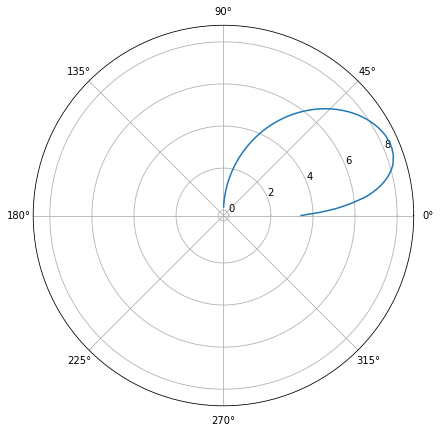

In [76]:
plt.polar(Phis,a)

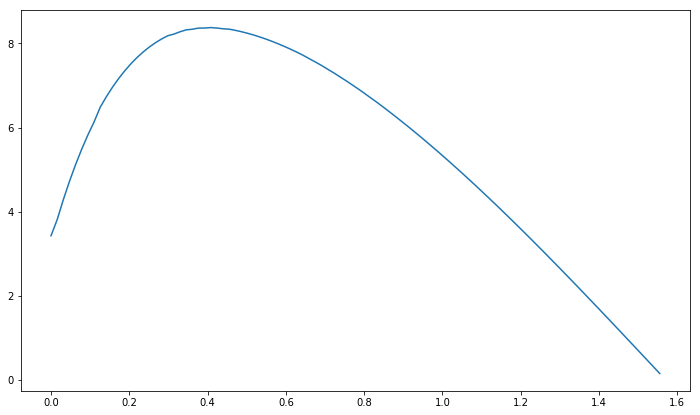

In [77]:
plt.plot(np.arange(0.,np.pi/2,np.pi/200),a)